### <kbd style="color: black; width: 150px; font-weight: bold;">Machine Learning for Predictions</kbd>

#### Outputs:
1. The minimum age of heart disease starts from 28 years old.
2. Most of the males and females get heart disease at the age of 54-55 years
3. Heart Disease Male percentage in the data: **78.91%**
4. Heart Disease Female Percentage in the data: **21.09%**
5. Males are **274.23%** more than females in the data.
6. The highest number of patient we get from **Cleveland** and the lowest is from **Switzerland**
    - The highest number of females are from **Cleveland** and lowest from **VA Long Beach**
    - The highest number of males are from **Hungary** and lowest from **Switzerland**
7. The Highest mean, median, mode we get from 'Age' column when we grouped it with 'dataset' column is:
    - Highest mean is from "Cleveland"(54.351) and lowest is from "VA Long Beach"(59.3500)
    - Highest median is from "Cleveland"(55.5) and lowest is from "VA Long Beach"(60)
    - Highest mode is from "Cleveland"(58) and lowest is from "VA Long Beach"(62,63)
8. The Highest Chest pain from 'cp' column is:
    - Most of the people have **asymptomatic angina** problem
    - Most of the people who have **asymptomatic angina** is from **Cleveland**
9. From **trestbps** column, I explore that:
    1. Most of the females has **trestbps** is **normal** (143)
    2. Most of the males has **trestbps** is **reversable defect** (478)
    3. Most of the **reverseable defect** we found from **Hungary**(149), **Switzerland**(86), **VA Long Beach**(171)
10. Impute Missing Values:
    1. We make two **function** for imputing missing values:
        1. **impute_categorical_missing_data** function for imputing Categorical/Object type data
        2. **impute_continuous_missing_data** function for imputing Continuous/Numerical data
11. Dealing with Outliars:
    1. We find that no one has the **trestbps** is equals to **0**.So, we remove that row from our dataset
    2. When we check about **chol**, we find that **171** people has chol equals to **0**, So we can not conclude this as Outliar.
    3. All other points who seems as outliar are not actually outliar, because they are dependent on each other(e.g :- A person should have a **trestbps** of 200.0)
12. Model Evaluation:
    - We Evaluate 9 Models and the Best Model we find is **GradientBoostingClassifier**
    - Although the Accuracy is not good but It is better than other Tested Models
    - We can improve the Accuracy by Using other Machine Learning Models and by doing some Feature Engineering, Feature Selection and Hyperparameter Tuning

In [ ]:
# Import the Libraries
# 1. To handle data 
import pandas as pd
import numpy as np
# 2. To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 3. To preprocess data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# 4. To impute data
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, mean_squared_error, mean_absolute_error
#pipeline
from sklearn.pipeline import Pipeline
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')



In [51]:
# Import necessary libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [52]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

Shape of processed training data: (643, 27)
Shape of processed test data: (276, 27)
Shape of one-hot encoded training labels: (643, 5)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                    

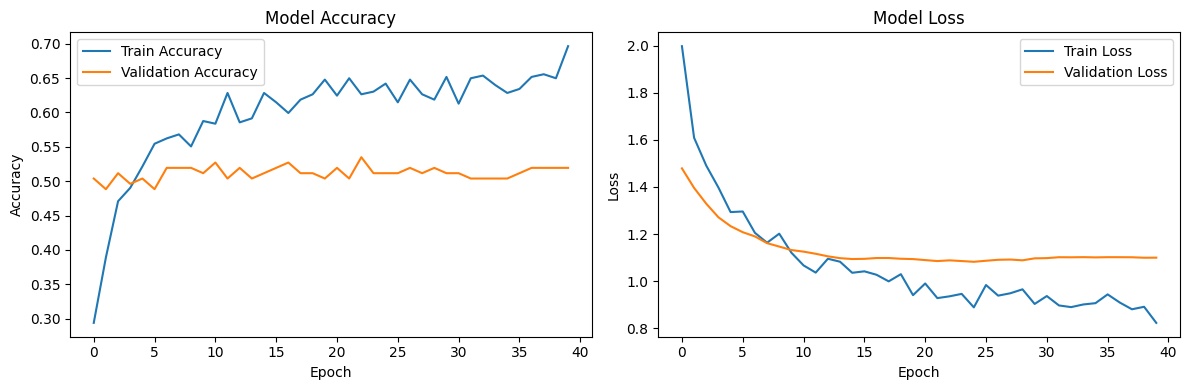

9/9 [==============================] - 0s 2ms/step
\nClassification Report (Deep Learning Model):
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       123
           1       0.54      0.46      0.50        80
           2       0.18      0.09      0.12        33
           3       0.18      0.25      0.21        32
           4       0.00      0.00      0.00         8

    accuracy                           0.58       276
   macro avg       0.33      0.34      0.33       276
weighted avg       0.54      0.58      0.55       276



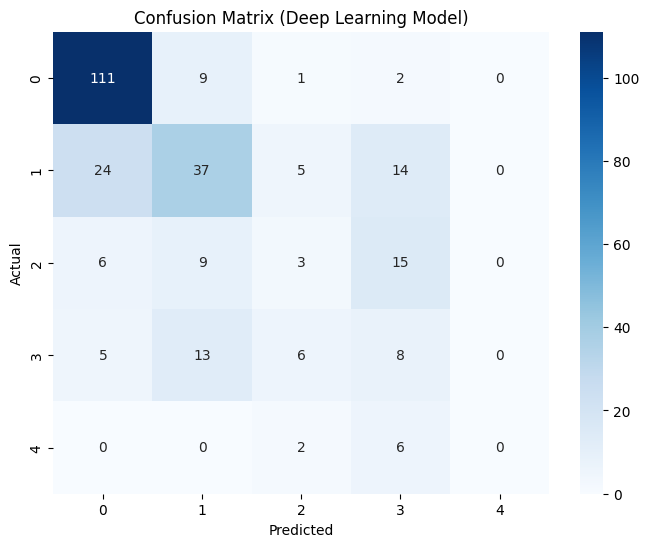

In [53]:
# Re-load the original dataframe to ensure we start with a clean slate for DL preprocessing
# as the df might have been modified by previous imputation steps in specific ways
# (e.g., label encoding of features for RF imputer)
df_dl = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")

# --- 1. Initial Imputation (using the same logic as before for consistency) ---
# Numerical columns imputed with IterativeImputer
imputer_numerical = IterativeImputer(max_iter=10, random_state=42)
numerical_cols_to_impute = ['trestbps', 'ca', 'thalch', 'oldpeak', 'chol'] # trestbps was float
df_dl[numerical_cols_to_impute] = imputer_numerical.fit_transform(df_dl[numerical_cols_to_impute])

# Categorical/Boolean columns imputed with your custom functions
# To reuse your functions, we need to handle the df global variable carefully or pass df_dl
# For simplicity here, I'll redefine the imputation slightly, focusing on mode for categorical
# and a simple imputer for booleans for this DL section.
# A more robust way would be to refactor your imputation functions.

# Simplified Imputation for categorical/boolean for DL section (example)
# You should ideally reuse your more sophisticated imputation functions.
# For demonstration, I'll use SimpleImputer for remaining NaNs.
# This is a simplification; your original imputation is more thorough.
remaining_missing_cols = ['thal', 'slope', 'fbs', 'exang', 'restecg']
for col in remaining_missing_cols:
    if df_dl[col].isnull().sum() > 0:
        if df_dl[col].dtype == 'object':
            # Impute with mode for object types
            mode_val = df_dl[col].mode()[0]
            df_dl[col].fillna(mode_val, inplace=True)
        elif df_dl[col].dtype == 'bool' or pd.api.types.is_bool_dtype(df_dl[col].dropna()): # fbs, exang
             # Impute boolean with mode (most frequent value)
            mode_val = df_dl[col].mode()[0]
            df_dl[col].fillna(mode_val, inplace=True)


# --- 2. Data Cleaning (as in your notebook) ---
df_dl = df_dl[df_dl['trestbps'] != 0].copy() # Remove rows where trestbps is 0
df_dl.reset_index(drop=True, inplace=True)


# --- 3. Define Features (X) and Target (y) ---
X_dl = df_dl.drop(['id', 'num'], axis=1) # Drop id and target
y_dl = df_dl['num']


# --- 4. Identify Column Types for Preprocessing ---
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
# 'dataset' is tricky. If it's just a source identifier, it might be better to drop it.
# If it represents different populations and you want to model that, one-hot encoding is an option.
# For now, let's include it in categorical.
categorical_features = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
boolean_features = ['fbs', 'exang'] # These will be converted to 0/1

# Convert boolean features to int (0 or 1)
for col in boolean_features:
    X_dl[col] = X_dl[col].astype(int)

# All boolean features are now numerical (0/1) and can be scaled
numerical_features.extend(boolean_features)


# --- 5. Preprocessing Pipeline for DL ---
preprocessor_dl = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False for dense array
    ],
    remainder='passthrough' # In case we missed any columns, though we shouldn't have
)

# --- 6. Split Data ---
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.3, random_state=42, stratify=y_dl)

# Apply preprocessing
X_train_dl_processed = preprocessor_dl.fit_transform(X_train_dl)
X_test_dl_processed = preprocessor_dl.transform(X_test_dl)

# One-hot encode the target variable for categorical_crossentropy
num_classes = len(y_dl.unique())
y_train_dl_encoded = to_categorical(y_train_dl, num_classes=num_classes)
y_test_dl_encoded = to_categorical(y_test_dl, num_classes=num_classes)

print(f"Shape of processed training data: {X_train_dl_processed.shape}")
print(f"Shape of processed test data: {X_test_dl_processed.shape}")
print(f"Shape of one-hot encoded training labels: {y_train_dl_encoded.shape}")

# --- 7. Define DL Model (MLP) ---
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dl_processed.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax') # num_classes and softmax for multi-class
])

# --- 8. Compile Model ---
dl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded y
                 metrics=['accuracy'])

dl_model.summary()

# --- 9. Define Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# --- 10. Train Model ---
history = dl_model.fit(X_train_dl_processed, y_train_dl_encoded,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2, # Use part of training data for validation
                       callbacks=[early_stopping, reduce_lr])

# --- 11. Evaluate Model ---
loss, accuracy_dl = dl_model.evaluate(X_test_dl_processed, y_test_dl_encoded, verbose=0)
print(f"Deep Learning Model - Test Loss: {loss:.4f}")
print(f"Deep Learning Model - Test Accuracy: {accuracy_dl:.4f}")

# --- 12. Plotting Training History (Optional) ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# --- 13. Further Evaluation (Confusion Matrix, Classification Report) ---
from sklearn.metrics import classification_report
y_pred_dl_probs = dl_model.predict(X_test_dl_processed)
y_pred_dl_classes = np.argmax(y_pred_dl_probs, axis=1) # Convert probabilities to class labels

print("\\nClassification Report (Deep Learning Model):")
print(classification_report(y_test_dl, y_pred_dl_classes)) # Use original y_test_dl for report

cm_dl = confusion_matrix(y_test_dl, y_pred_dl_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Deep Learning Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Initial data shape: (920, 16)
Initial missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Data shape after initial cleaning/imputation: (919, 16)
Missing values after initial imputation:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Target variable distribution (y):
num
0    0.447225
1    0.288357
2    0.118607
3    0.115343
4    0.030468
Name: proportion, dtype: float64

Training data shape: X_train: (689, 14), y_train: (689,)
Test data shape: X_test: (230, 14), y_test: (230,)
Shape of processed training data (X_train_processed): (689, 21)
Shape of processed test d

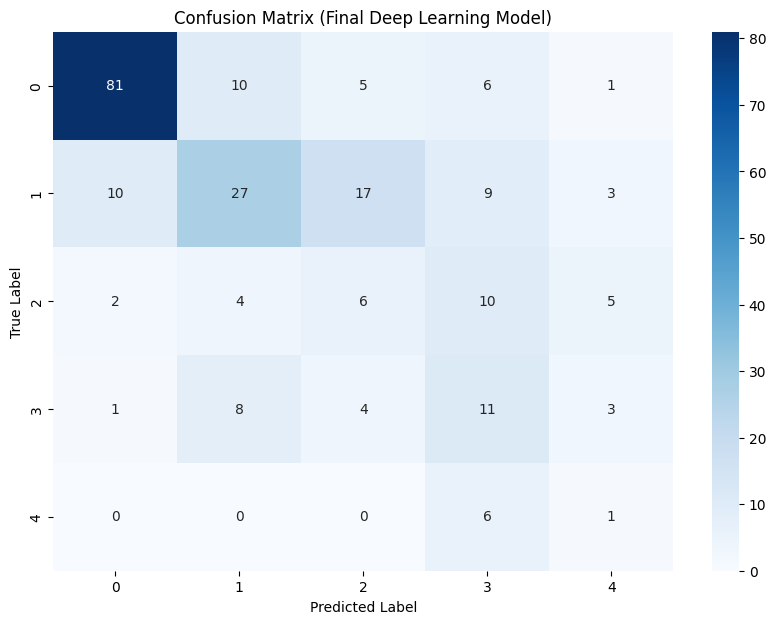

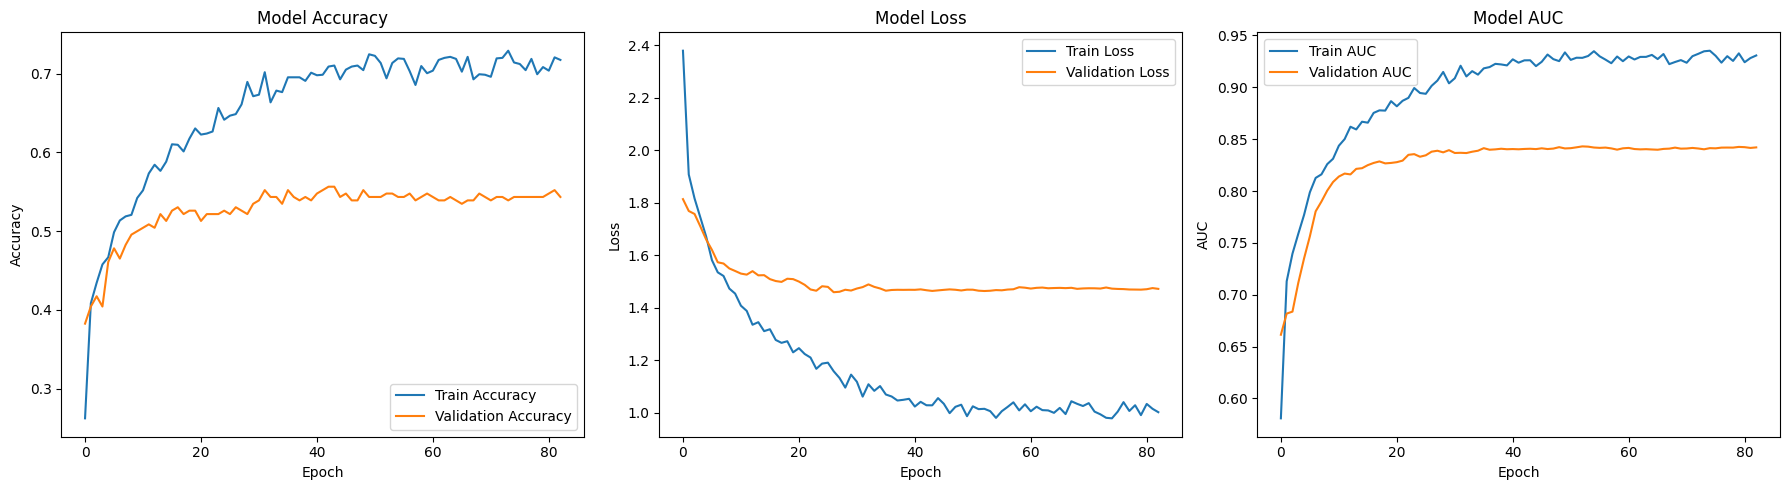


Preprocessor saved as dl_preprocessor.pkl
Best DL model saved as best_heart_disease_dl_model.keras


In [54]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

# --- Configuration & Reproducibility ---
warnings.filterwarnings('ignore')
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# --- 1. Data Loading ---
try:
    df_raw = pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
except FileNotFoundError:
    print("Dataset file not found. Please check the path.")
    exit()

df = df_raw.copy() # Work on a copy

# --- 2. Initial Data Cleaning & Basic Imputation ---
print("Initial data shape:", df.shape)
print("Initial missing values:\n", df.isnull().sum())

# Numerical columns to impute with IterativeImputer
numerical_cols_iterative_impute = ['trestbps', 'ca', 'thalch', 'oldpeak', 'chol']
imputer_numerical = IterativeImputer(max_iter=10, random_state=SEED, estimator=RandomForestRegressor(random_state=SEED)) # Added estimator
df[numerical_cols_iterative_impute] = imputer_numerical.fit_transform(df[numerical_cols_iterative_impute])

# Categorical/Boolean columns to impute with SimpleImputer (most frequent)
# Convert boolean columns to object type temporarily for consistent imputation strategy with SimpleImputer
boolean_cols_original = ['fbs', 'exang']
for col in boolean_cols_original:
    if col in df.columns and df[col].isnull().any(): # Check if column exists and has NaNs
        df[col] = df[col].astype(object) # Convert to object for SimpleImputer

categorical_bool_cols_simple_impute = ['thal', 'slope', 'fbs', 'exang', 'restecg']
imputer_categorical = SimpleImputer(strategy='most_frequent')

for col in categorical_bool_cols_simple_impute:
    if col in df.columns and df[col].isnull().sum() > 0: # Ensure column exists and has NaNs
        df[col] = imputer_categorical.fit_transform(df[[col]]).ravel()

# Convert boolean columns back to boolean type after imputation
for col in boolean_cols_original:
    if col in df.columns:
        # Handle potential string representations of True/False if SimpleImputer imputed them as strings
        if df[col].dtype == 'object':
            df[col] = df[col].replace({'True': True, 'False': False, '1.0': True, '0.0': False, 1.0:True, 0.0:False})
        df[col] = df[col].astype(bool)


# Remove rows where trestbps might have been imputed to 0 or was originally 0
df = df[df['trestbps'] > 0].copy() # Use >0 to be safe
df.reset_index(drop=True, inplace=True)

print("\nData shape after initial cleaning/imputation:", df.shape)
print("Missing values after initial imputation:\n", df.isnull().sum())
if df.isnull().sum().sum() > 0:
    print("\nWarning: There are still missing values after initial imputation. Review imputation steps.")


# --- 3. Define Features (X) and Target (y) ---
X = df.drop(['id', 'num'], axis=1)
y = df['num']

print("\nTarget variable distribution (y):")
print(y.value_counts(normalize=True))

# --- 4. Identify Column Types for Preprocessing ---
# 'dataset' is kept as a categorical feature
categorical_features = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
# 'fbs' and 'exang' are boolean, will be converted to int (0/1) then scaled
boolean_features = ['fbs', 'exang']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Convert boolean features to int (0 or 1)
for col in boolean_features:
    X[col] = X[col].astype(int)

# Add converted boolean features to numerical_features list for scaling
numerical_features.extend(boolean_features)


# --- 5. Train-Test Split (Stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=SEED, stratify=y
)
print(f"\nTraining data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# --- 6. Preprocessing Pipeline (StandardScaler for Numerical, OneHotEncoder for Categorical) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features) # drop='first' to avoid multicollinearity
    ],
    remainder='passthrough' # Should be empty if all columns are handled
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape of processed training data (X_train_processed): {X_train_processed.shape}")
print(f"Shape of processed test data (X_test_processed): {X_test_processed.shape}")


# --- 7. SMOTE for Handling Class Imbalance (Applied ONLY to training data) ---
# Determine k_neighbors for SMOTE dynamically
unique_classes, class_counts_train = np.unique(y_train, return_counts=True)
min_class_count_train = np.min(class_counts_train)
k_neighbors_smote = max(1, min(5, min_class_count_train - 1 if min_class_count_train > 1 else 1))

print(f"\nOriginal training label distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"Min class count in training set: {min_class_count_train}, using k_neighbors={k_neighbors_smote} for SMOTE")

smote = SMOTE(random_state=SEED, k_neighbors=k_neighbors_smote)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print(f"\nSMOTE resampled training data shape: {X_train_smote.shape}")
print(f"SMOTE resampled training label distribution:\n{pd.Series(y_train_smote).value_counts().sort_index()}")

# --- 8. Target Variable Encoding (One-Hot Encoding) ---
num_classes = len(df['num'].unique()) # Use df to get all potential classes
y_train_encoded = to_categorical(y_train_smote, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

print(f"Shape of one-hot encoded training labels (y_train_encoded): {y_train_encoded.shape}")
print(f"Shape of one-hot encoded test labels (y_test_encoded): {y_test_encoded.shape}")

# --- 9. Deep Learning Model Architecture ---
dl_model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_smote.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# --- 10. Compile Model ---
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005) # Slightly lower initial LR
dl_model.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]) # Added AUC

print("\nDeep Learning Model Summary:")
dl_model.summary()

# --- 11. Define Callbacks ---
early_stopping = EarlyStopping(monitor='val_auc', mode='max', patience=30, restore_best_weights=True, verbose=1) # Monitor val_auc
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6, verbose=1)
# model_checkpoint = ModelCheckpoint('best_heart_disease_dl_model.keras', monitor='val_auc', mode='max', save_best_only=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_heart_disease_dl_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# --- 12. Train Model ---
print("\nStarting Deep Learning Model Training...")
history = dl_model.fit(X_train_smote, y_train_encoded,
                       epochs=200, # Allow more epochs, early stopping will manage
                       batch_size=32,
                       validation_data=(X_test_processed, y_test_encoded), # Use test set for validation here (or a separate val set)
                       callbacks=[early_stopping, reduce_lr, model_checkpoint],
                       verbose=1)

# --- 13. Load Best Model (if saved by ModelCheckpoint) and Evaluate ---
print("\nLoading best model from checkpoint for final evaluation...")
# best_dl_model = load_model('best_heart_disease_dl_model.keras')
best_dl_model = load_model('best_heart_disease_dl_model.h5')
loss_final, accuracy_final, auc_final = best_dl_model.evaluate(X_test_processed, y_test_encoded, verbose=0)
print(f"\nFinal Deep Learning Model - Test Loss: {loss_final:.4f}")
print(f"Final Deep Learning Model - Test Accuracy: {accuracy_final:.4f}")
print(f"Final Deep Learning Model - Test AUC: {auc_final:.4f}")

# --- 14. Classification Report and Confusion Matrix ---
y_pred_probs_final = best_dl_model.predict(X_test_processed)
y_pred_classes_final = np.argmax(y_pred_probs_final, axis=1)

print("\nClassification Report (Final Deep Learning Model):")
print(classification_report(y_test, y_pred_classes_final, zero_division=0))

cm_final = confusion_matrix(y_test, y_pred_classes_final)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Final Deep Learning Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 15. Plotting Training History of the Best Model ---
if history: # Check if training happened (in case early stopping was too aggressive or epochs=0)
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- 16. Save the Preprocessor (important for new data) ---
with open('dl_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("\nPreprocessor saved as dl_preprocessor.pkl")
print("Best DL model saved as best_heart_disease_dl_model.keras")